In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import heapq
import matplotlib.colors
import os 
os.chdir("/home/zuko/vvp-projekt/vvp_bludiste/data")


def load_maze_from_csv(data):
    """
    Načte bludiště z CSV souboru.

    Args:

    filename (str): Název CSV souboru.

    Returns:
    numpy.ndarray: Matice reprezentující bludiště.
    """
    with open(data, 'r') as file:
        maze_reader = csv.reader(file)
        maze = []
        for row in maze_reader:
            maze.append([1 if cell == '1' else 0 for cell in row])
    return np.array(maze)

def incidence_matrix(maze):
    """
    Vytvoří incidenční matici bludiště.

    Args:
    maze (numpy.ndarray): Matice reprezentující bludiště.

    Returns:
    numpy.ndarray: Incidenční matice bludiště.
    """
    n = len(maze)
    incidence = np.zeros((n*n, n*n), dtype=int)
    for i in range(n):
        for j in range(n):
            if not maze[i][j]:
                index = i * n + j
                if i > 0 and not maze[i-1][j]:  # check top
                    incidence[index][index-n] = 1
                if i < n-1 and not maze[i+1][j]:  # check bottom
                    incidence[index][index+n] = 1
                if j > 0 and not maze[i][j-1]:  # check left
                    incidence[index][index-1] = 1
                if j < n-1 and not maze[i][j+1]:  # check right
                    incidence[index][index+1] = 1
    return incidence

def dijkstra_shortest_path(maze):
    """
    Najde nejkratší cestu v bludišti pomocí Dijkstrova algoritmu.

    Args:
    maze (numpy.ndarray): Matice reprezentující bludiště.

    Returns:
    list of tuples: Cesty od startu do cíle.
    """
    n = len(maze)
    start = (0, 0)
    end = (n - 1, n - 1)
    distances = {(i, j): float('inf') for i in range(n) for j in range(n)}
    distances[start] = 0
    visited = set()
    prev = {}
    queue = [(0, start)]

    while queue:
        current_dist, current_node = heapq.heappop(queue)
        if current_node == end:
            path = []
            while current_node in prev:
                path.append(current_node)
                current_node = prev[current_node]
            path.append(start)
            return path[::-1]

        visited.add(current_node)
        row, col = current_node
        neighbors = [(row-1, col), (row+1, col), (row, col-1), (row, col+1)]
        for neighbor_row, neighbor_col in neighbors:
            if 0 <= neighbor_row < n and 0 <= neighbor_col < n:
                neighbor_node = (neighbor_row, neighbor_col)
                if maze[neighbor_row][neighbor_col] == 0 and neighbor_node not in visited:
                    new_dist = current_dist + 1
                    if new_dist < distances[neighbor_node]:
                        distances[neighbor_node] = new_dist
                        prev[neighbor_node] = current_node
                        heapq.heappush(queue, (new_dist, neighbor_node))
    return []

def draw_maze_with_path(maze, path):
    """
    Vykreslí bludiště s nalezenou cestou.

    Args:
    maze (numpy.ndarray): Matice reprezentující bludiště.
    path (list of tuples): Cesty od startu do cíle.
    """

    maze_with_path = maze.copy()

    # Set the path to a temporary value
    for node in path:
        maze_with_path[node[0]][node[1]] = 2

    # Create a custom color map
    cmap = matplotlib.colors.ListedColormap(['white', 'black', 'red'])

    plt.imshow(maze_with_path, cmap=cmap)
    plt.show()
def generate_maze(template="empty", size=10):
    """
    Vygeneruje bludiště podle zadané šablony.

    Args:
    template (str): Typ šablony (např. "empty", "slalom").
    size (int): Velikost bludiště (N x N).

    Returns:
    numpy.ndarray: Vygenerované bludiště.
    """
    if template == "empty":
        return np.zeros((size, size), dtype=bool)
    elif template == "slalom":
        maze = np.zeros((size, size), dtype=bool)
        for i in range(1, size-1):
            if i % 2 == 0:
                maze[i][1::2] = True
            else:
                maze[i][0::2] = True
        return maze
    else:
        raise ValueError("Neznámá šablona bludiště.")

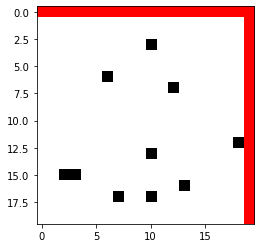

In [2]:
maze = load_maze_from_csv("maze_1.csv")
incidence = incidence_matrix(maze)
shortest_path = dijkstra_shortest_path(maze)
draw_maze_with_path(maze, shortest_path)

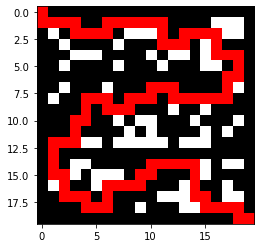

In [3]:
maze = load_maze_from_csv("maze_2.csv")
incidence = incidence_matrix(maze)
shortest_path = dijkstra_shortest_path(maze)
draw_maze_with_path(maze, shortest_path)


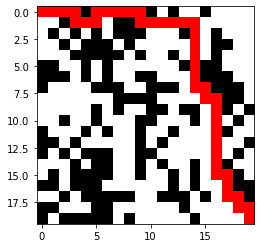

In [4]:
maze = load_maze_from_csv("maze_3.csv")
incidence = incidence_matrix(maze)
shortest_path = dijkstra_shortest_path(maze)
draw_maze_with_path(maze, shortest_path)


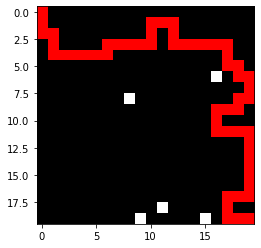

In [5]:
maze = load_maze_from_csv("maze_4.csv")
incidence = incidence_matrix(maze)
shortest_path = dijkstra_shortest_path(maze)
draw_maze_with_path(maze, shortest_path)


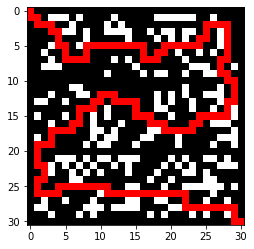

In [6]:
maze = load_maze_from_csv("maze_5.csv")
incidence = incidence_matrix(maze)
shortest_path = dijkstra_shortest_path(maze)
draw_maze_with_path(maze, shortest_path)
